In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

#import data 
data = pd.read_csv('C:/Users/John Robert/Desktop/100DaysOfMLCode/Decision tree/housing_price_iowa.csv')

y = data.SalePrice 
X = data.drop(['SalePrice'],axis=1).select_dtypes(exclude=['object'])

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)


In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
#create model 
my_model = XGBRegressor(n_estimators = 1000,learning_rate =0.05,n_jobs=1)

#Fit and train teh model 
# Add silent=True to avoid printing out updates with each cycle 
my_model.fit(train_X,train_y, early_stopping_rounds =10 ,eval_set=[(test_X, test_y)], verbose= False)

#make predictions 
predicted_y = my_model.predict(test_X)

#Calculate error 
mae = mean_absolute_error(predicted_y ,test_y) 

print("Mean Absolute Error : {}".format(mae))

Mean Absolute Error : 16275.302868150686


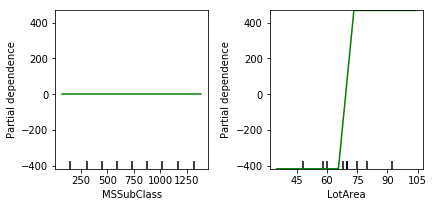

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

#create model 
partial_dependence_model = GradientBoostingRegressor(n_estimators=10)

#fit the model 
partial_dependence_model.fit (train_X,train_y)

my_plots = plot_partial_dependence(partial_dependence_model,
                                   train_X, #raw predictors data 
                                   features=[0,2], #column numbers of the plots we want to show 
                                   feature_names = ['MSSubClass','LotFrontage','LotArea'], #labels on graphs
                                   grid_resolution=10) #number of values to plot of x axis